<a href="https://colab.research.google.com/github/Rafael-Muthemba-K/Hospital-Analysis/blob/main/HospitalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load files
hospital_general_info = pd.read_excel('/content/hospital_general_info.xlsx')
outpatient_df_2011 = pd.read_json('/content/outpatient_charges2011.db.json')
outpatient_df_2012 = pd.read_json('/content/outpatient_charges2012.db.json')
outpatient_df_2013 = pd.read_json('/content/outpatient_charges2013.db.json')
inpatient_df_2011 = pd.read_json('/content/inpatient_2011.json')
inpatient_df_2012 = pd.read_json('/content/inpatient_2012.json')
inpatient_df_2013 = pd.read_json('/content/inpatient_2013.json')


In [ ]:
# Rename columns in outpatient_df_2013 to include '_2013' suffix
outpatient_df_2013 = outpatient_df_2013.rename(
    columns={
        'provider_name': 'provider_name_2013',
        'provider_street_address': 'provider_street_address_2013',
        'provider_city': 'provider_city_2013',
        'provider_state': 'provider_state_2013',
        'provider_zipcode': 'provider_zipcode_2013',
        'outpatient_services': 'outpatient_services_2013',
        'average_estimated_submitted_charges': 'average_estimated_submitted_charges_2013',
        'average_total_payments': 'average_total_payments_2013'
    }
)


In [ ]:
inpatient_df_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           10000 non-null  int64  
 1   provider_name                         10000 non-null  object 
 2   provider_street_address               10000 non-null  object 
 3   provider_city                         10000 non-null  object 
 4   provider_state                        10000 non-null  object 
 5   provider_zipcode                      10000 non-null  int64  
 6   hospital_referral_region_description  10000 non-null  object 
 7   total_discharges                      10000 non-null  int64  
 8   average_covered_charges               10000 non-null  float64
 9   average_total_payments                10000 non-null  float64
 10  average_medicare_payments             10000 non-null  float64
 11  icd_category    

In [ ]:
outpatient_df_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provider_id                          43372 non-null  int64  
 1   provider_name                        43372 non-null  object 
 2   provider_street_address              43372 non-null  object 
 3   provider_city                        43372 non-null  object 
 4   provider_state                       43372 non-null  object 
 5   provider_zipcode                     43372 non-null  int64  
 6   apc                                  43372 non-null  object 
 7   outpatient_services                  43372 non-null  int64  
 8   average_estimated_submitted_charges  43372 non-null  float64
 9   average_total_payments               43372 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.3+ MB


In [ ]:
# Merge outpatient data for 2011 and 2012 on 'APC' and 'provider_id'
outpatient_df = outpatient_df_2011.merge(outpatient_df_2012, on=['apc', 'provider_id'], suffixes=('_2011', '_2012'))

# Merge the result with outpatient data for 2013
outpatient_df = outpatient_df.merge(outpatient_df_2013, on=['apc', 'provider_id'], suffixes=('', '_2013'))


In [ ]:
outpatient_df.head()

,provider_id,provider_name_2011,provider_street_address_2011,provider_city_2011,provider_state_2011,provider_zipcode_2011,apc,outpatient_services_2011,average_estimated_submitted_charges_2011,average_total_payments_2011,...,average_estimated_submitted_charges_2012,average_total_payments_2012,provider_name_2013,provider_street_address_2013,provider_city_2013,provider_state_2013,provider_zipcode_2013,outpatient_services_2013,average_estimated_submitted_charges_2013,average_total_payments_2013
0,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0013 - Level II Debridement & Destruction,31,327.515806,49.889032,...,324.739730,52.120270,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,30,373.620000,63.920333
1,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0015 - Level III Debridement & Destruction,936,299.867992,104.416068,...,301.517350,98.425032,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,867,329.314244,106.978973
2,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0020 - Level II Excision/ Biopsy,14,5409.921429,527.096429,...,3963.837500,567.880000,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,42,3140.716429,583.524286
3,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0078 - Level III Pulmonary Treatment,48,566.275833,101.360000,...,597.554839,96.136387,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,204,600.135784,101.985882
4,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0096 - Level II Noninvasive Physiologic Studies,68,767.822059,107.335294,...,663.985714,103.934881,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,75,563.778667,109.394133


In [ ]:
# Merge inpatient data across years
inpatient_df = inpatient_df_2011.merge(inpatient_df_2012, on=['provider_id'], suffixes=('_2011', '_2012'))



In [ ]:
inpatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637064 entries, 0 to 637063
Data columns (total 23 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   provider_id                                637064 non-null  int64  
 1   provider_name_2011                         637064 non-null  object 
 2   provider_street_address_2011               637064 non-null  object 
 3   provider_city_2011                         637064 non-null  object 
 4   provider_state_2011                        637064 non-null  object 
 5   provider_zipcode_2011                      637064 non-null  int64  
 6   hospital_referral_region_description_2011  637064 non-null  object 
 7   total_discharges_2011                      637064 non-null  int64  
 8   average_covered_charges_2011               637064 non-null  float64
 9   average_total_payments_2011                637064 non-null  float64
 10  average_

In [ ]:
# Calculate the average of average_total_payments across 2011, 2012, and 2013 for outpatient data
outpatient_df['average_outpatient_total_payment'] = outpatient_df[['average_total_payments_2011',
                                                                   'average_total_payments_2012',
                                                                   'average_total_payments_2013']].mean(axis=1)


In [ ]:
outpatient_df.head()

,provider_id,provider_name_2011,provider_street_address_2011,provider_city_2011,provider_state_2011,provider_zipcode_2011,apc,outpatient_services_2011,average_estimated_submitted_charges_2011,average_total_payments_2011,...,provider_name_2013,provider_street_address_2013,provider_city_2013,provider_state_2013,provider_zipcode_2013,outpatient_services_2013,average_estimated_submitted_charges_2013,average_total_payments_2013,Year,average_outpatient_total_payment
0,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0013 - Level II Debridement & Destruction,31,327.515806,49.889032,...,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,30,373.620000,63.920333,2013,55.309879
1,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0015 - Level III Debridement & Destruction,936,299.867992,104.416068,...,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,867,329.314244,106.978973,2013,103.273358
2,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0020 - Level II Excision/ Biopsy,14,5409.921429,527.096429,...,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,42,3140.716429,583.524286,2013,559.500238
3,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0078 - Level III Pulmonary Treatment,48,566.275833,101.360000,...,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,204,600.135784,101.985882,2013,99.827423
4,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0096 - Level II Noninvasive Physiologic Studies,68,767.822059,107.335294,...,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,75,563.778667,109.394133,2013,106.888103


In [ ]:
# Calculate the average of average_total_payments for inpatient data (2011 and 2012)
inpatient_df['average_inpatient_total_payment'] = inpatient_df[['average_total_payments_2011',
                                                                'average_total_payments_2012']].mean(axis=1)

# Calculate the average of average_medicare_payments for inpatient data (2011 and 2012)
inpatient_df['average_inpatient_medicare_payment'] = inpatient_df[['average_medicare_payments_2011',
                                                                   'average_medicare_payments_2012']].mean(axis=1)



In [ ]:
outpatient_df['outpatient_rank'] = outpatient_df['average_outpatient_total_payment'].rank(ascending=False, method='dense')


In [ ]:
outpatient_df['outpatient_rank'].head()

,outpatient_rank
0,34826.0
1,22620.0
2,5520.0
3,23459.0
4,21987.0


In [ ]:
# Rank providers based on average total inpatient payments
inpatient_df['inpatient_total_payment_rank'] = inpatient_df['average_inpatient_total_payment'].rank(ascending=False, method='dense')

# Rank providers based on average Medicare inpatient payments
inpatient_df['inpatient_medicare_payment_rank'] = inpatient_df['average_inpatient_medicare_payment'].rank(ascending=False, method='dense')


In [ ]:
inpatient_df.to_csv('ranked_inpatient_data.csv', index=False)
outpatient_df.to_csv('ranked_outpatient_data.csv', index=False)


##Time Series Analysis

In [ ]:
# Add a 'Year' column to each DataFrame
outpatient_df_2011['Year'] = 2011
outpatient_df_2012['Year'] = 2012
outpatient_df_2013['Year'] = 2013

# Combine the outpatient data from all years
combined_outpatient_df = pd.concat([outpatient_df_2011, outpatient_df_2012, outpatient_df_2013])

In [ ]:


# Group by 'Year', 'provider_id', 'provider_name', and 'apc' to get the average estimated submitted charges
time_series_df = combined_outpatient_df.groupby(['Year', 'provider_id', 'provider_name', 'apc'])['average_estimated_submitted_charges'].mean().reset_index()

# Preview the resulting DataFrame
print(time_series_df.head())


   Year  provider_id                     provider_name  \
0  2011        10001  SOUTHEAST ALABAMA MEDICAL CENTER   
1  2011        10001  SOUTHEAST ALABAMA MEDICAL CENTER   
2  2011        10001  SOUTHEAST ALABAMA MEDICAL CENTER   
3  2011        10001  SOUTHEAST ALABAMA MEDICAL CENTER   
4  2011        10001  SOUTHEAST ALABAMA MEDICAL CENTER   

                                          apc  \
0   0013 - Level II Debridement & Destruction   
1  0015 - Level III Debridement & Destruction   
2             0019 - Level I Excision/ Biopsy   
3            0020 - Level II Excision/ Biopsy   
4      0074 - Level IV Endoscopy Upper Airway   

   average_estimated_submitted_charges  
0                           328.975687  
1                           556.202944  
2                          4097.132500  
3                          4123.556579  
4                          6015.466364  


In [ ]:
# Export the DataFrame to CSV
time_series_df.to_csv('time_series_avg_charge_per_apc.csv', index=False)


##Geographical Locations

In [ ]:
# Filter the dataset where the value of 'emergency_services' ='TRUE'
emergency_hospitals = hospital_general_info[hospital_general_info['emergency_services =\'TRUE\'.1'] == True]

# Check the filtered data
print(emergency_hospitals)

     emergency_services ='TRUE'                              hospital_name  \
1                         10051                     GREENE COUNTY HOSPITAL   
2                         10102                      J PAUL JONES HOSPITAL   
3                         30074                             SELLS HOSPITAL   
6                         30139    DIGNITY HEALTH ARIZONA GENERAL HOSPITAL   
7                         40156  BAPTIST MEMORIAL HOSPITAL-CRITTENDEN, INC   
...                         ...                                        ...   
5330                     670259                           CAPROCK HOSPITAL   
5331                     670260               TEXAS HEALTH HOSPITAL FRISCO   
5333                     670267           THE WOODLANDS SPECIALTY HOSPITAL   
5334                     670280        NORTH HOUSTON SURGICAL HOSPITAL LLC   
5335                     670285                KINGWOOD EMERGENCY HOSPITAL   

                         address          city state  zip_code 

In [ ]:
# Filter for emergency charges based on 'apc' column (assuming emergency services are identified by specific APC codes)
emergency_hospitals = combined_outpatient_df[combined_outpatient_df['apc'].str.contains('emergency', case=False, na=False)]


# Calculate the average total payments per provider per state
emergency_avg_payment = emergency_hospitals.groupby(['provider_state', 'provider_id', 'provider_name'])['average_total_payments'].mean().reset_index()

In [ ]:

combined_outpatient_df.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,outpatient_services,average_estimated_submitted_charges,average_total_payments,Year
0,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0013 - Level II Debridement & Destruction,31,327.515806,49.889032,2011
1,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0015 - Level III Debridement & Destruction,936,299.867992,104.416068,2011
2,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0020 - Level II Excision/ Biopsy,14,5409.921429,527.096429,2011
3,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0078 - Level III Pulmonary Treatment,48,566.275833,101.360000,2011
4,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0096 - Level II Noninvasive Physiologic Studies,68,767.822059,107.335294,2011


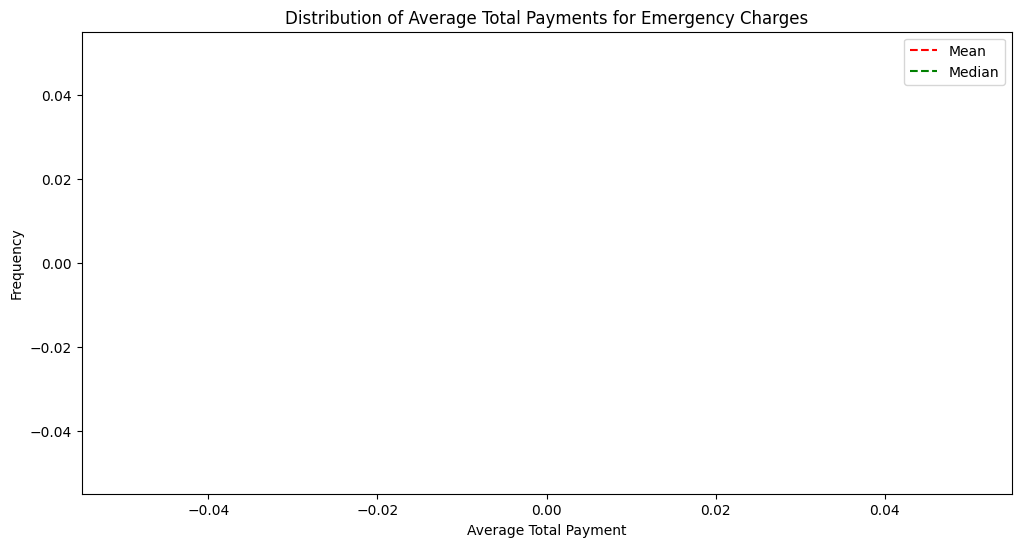

Mean of average total payments: nan
Median of average total payments: nan


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the emergency data has already been filtered and combined in a DataFrame named emergency_df

# Plot the distribution of average total payments
plt.figure(figsize=(12, 6))
sns.histplot(emergency_avg_payment['average_total_payments'], kde=True, bins=30)
plt.title('Distribution of Average Total Payments for Emergency Charges')
plt.xlabel('Average Total Payment')
plt.ylabel('Frequency')
plt.axvline(emergency_avg_payment['average_total_payments'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(emergency_avg_payment['average_total_payments'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

# Print summary statistics to help define the affordable threshold
mean_payment = emergency_avg_payment['average_total_payments'].mean()
median_payment = emergency_avg_payment['average_total_payments'].median()
print(f"Mean of average total payments: {mean_payment}")
print(f"Median of average total payments: {median_payment}")


In [ ]:
# Define affordability threshold (e.g., providers with an average total payment below a certain value)
affordability_threshold = 1000
affordable_providers = emergency_avg_payment[emergency_avg_payment['average_total_payments'] < affordability_threshold]

# Export data to CSV for Tableau
affordable_providers.to_csv('affordable_emergency_providers.csv', index=False)

# Preview the DataFrame
print(affordable_providers.head())